In [4]:
import numpy as np
import pandas as pd

### loading dataset

In [5]:
data = pd.read_csv("student-data.csv")

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [7]:
data.shape

(395, 31)

In [9]:
type(data)

pandas.core.frame.DataFrame

### Exploratory data analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

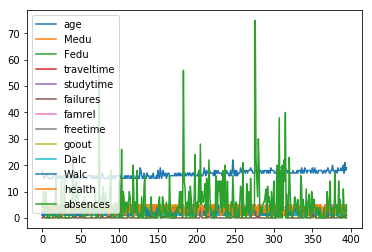

In [12]:
a = data.plot()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [16]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

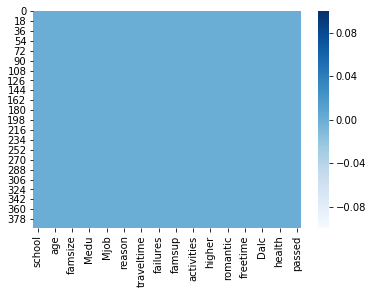

In [20]:
a = sns.heatmap(data.isnull(),cmap='Blues')

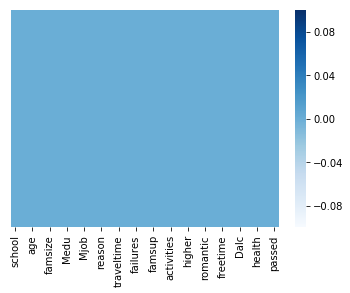

In [21]:
a = sns.heatmap(data.isnull(),cmap='Blues',yticklabels=False)

#### this indicates that we have no any null values in the dataset

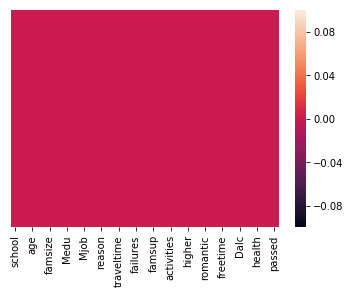

In [24]:
a = sns.heatmap(data.isna(),yticklabels=False)

#### this heatmap indicates that we have no any 'NA' values in the dataset

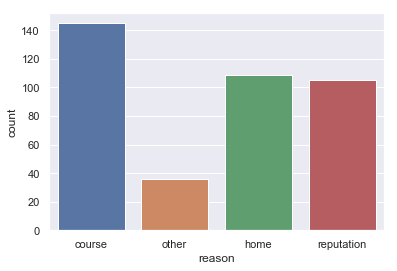

In [31]:
sns.set(style='darkgrid')
sns.countplot(data=data,x='reason')

This indicates the count for choosing school of various reasons.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

In [32]:
data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes


calculating total passed students

In [44]:
passed = data.loc[data.passed == 'yes']
passed.shape

(265, 31)

In [45]:
tot_passed=passed.shape[0]

In [46]:
print('total passed students is: {} '.format(tot_passed))

total passed students is: 265 


calculating total failed students

In [47]:
failed = data.loc[data.passed == 'no']
print('total failed students is: {}'.format(failed.shape[0]))

total failed students is: 130


### Feature Engineering

In [55]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


To identity feature and target variable lets first do some feature engineering stuff!

In [56]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [57]:
data.columns[-1]

'passed'

Here 'passed' is our target variable. Since in this system we need to develop the model that will predict the likelihood that a given student will pass, quantifying whether an intervention is necessary.

In [61]:
target = data.columns[-1] 

In [64]:
data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [68]:
#initially taking all columns as our feature variables

feature = list(data.columns[:-1])

In [70]:
data[target].head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

In [71]:
data[feature].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


Now taking feature and target data in seperate dataframe

In [72]:
featuredata = data[feature]
targetdata = data[target]

Now we need to convert several non-numeric columns like 'internet' into numerical form for the model to process 

In [79]:
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
                
        output = output.join(col_data)

    return output

In [80]:
featuredata = preprocess_features(featuredata)

In [81]:
type(featuredata)

pandas.core.frame.DataFrame

In [184]:
featuredata.head()

,school_GP,school_MS,sex_M,age,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,0,18,1,1,0,1,0,4,...,1,0,0,4,3,4,1,1,3,6
1,1,0,0,17,1,1,0,0,1,1,...,1,1,0,5,3,3,1,1,3,4
2,1,0,0,15,1,0,1,0,1,1,...,1,1,0,4,3,2,2,3,3,10
3,1,0,0,15,1,1,0,0,1,4,...,1,1,1,3,2,2,1,1,5,2
4,1,0,0,16,1,1,0,0,1,3,...,1,0,0,4,3,2,1,2,5,4


In [85]:
featuredata.drop(['address_R','sex_F'],axis=1,inplace=True)

In [187]:
featuredata.columns

Index(['school_GP', 'school_MS', 'sex_M', 'age', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'],
      dtype='object')

In [ ]:
featuredata.drop(['famsize_GT3','Pstatus_A',],axis=1,inplace=True)

### MODEL IMPLEMENTATION

## Decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model=DecisionTreeClassifier()

In [159]:
X_train, X_test, y_train, y_test = train_test_split(featuredata, targetdata, test_size=0.33, random_state=6)

In [160]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
predictions = model.predict(X_test)

In [163]:
accuracy_score(y_test,predictions)*100

67.17557251908397

## K-Nearest Neighbours

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
new_classifier = KNeighborsClassifier(n_neighbors=7)

In [165]:
new_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [166]:
predictions2 = new_classifier.predict(X_test)

In [167]:
accuracy_score(y_test,predictions2)*100

67.17557251908397

## SVM

In [175]:
from sklearn import svm
clf = svm.SVC(random_state=6)

In [176]:
clf.fit(featuredata,targetdata) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=6, shrinking=True,
  tol=0.001, verbose=False)

In [178]:
clf.score(featuredata,targetdata)

0.7822784810126582

In [179]:
predictions3= clf.predict(X_test)

In [181]:
accuracy_score(y_test,predictions3)*100

80.1526717557252

## Model application areas

#### KNN

KNN: k-NN is often used in search applications where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”. The way you measure similarity is by creating a vector representation of the items, and then compare the vectors using an appropriate distance metric (like the Euclidean distance, for example).

The biggest use case of k-NN search might be Recommender Systems. If you know a user likes a particular item, then you can recommend similar items for them.

KNN strength: effective for larger datasets, robust to noisy training data

KNN weakness: need to determine value of k, computation cost is high.

#### Decision tree

Decision Tree: Can handle both numerical and categorical data. 

Decision tree strength: Decision trees implicitly perform feature selection, require relatively little effort from users for data preparation, easy to interpret and explain to executives.

Decision tree weakness: Over Fitting, not fit for continuous variables.

#### SVM

SVM: SVM classify parts of the image as a face and non-face and create a square boundary around the face(Facial recognization).
We use SVMs to recognize handwritten characters used widely(Handwritten recognization).

Strengths: SVM's can model non-linear decision boundaries, and there are many kernels to choose from. They are also fairly robust against overfitting, especially in high-dimensional space.

Weaknesses: However, SVM's are memory intensive, trickier to tune due to the importance of picking the right kernel, and don't scale well to larger datasets.

## Choosing the best model

In this case, I will be using the SVM model to predict the outcomes. 80.15% of accuracy is achieved in SVM in our case.

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. 

It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.